In [1]:
import os
import sys
import glob
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np

from   mpl_toolkits.axes_grid1 import make_axes_locatable
from   astropy.table import Table

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/Sam/DESI/')

In [3]:
from   gama_limits import gama_field

In [4]:
gama_d8 = Table.read(os.environ['CSCRATCH'] + '/norberg//GAMA4/gama_gold_ddp_n8.fits')
gama_d8

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64
386805,587727944563819000,134.01009244,2.32209878,18.999538,0.19489,4,G09_Y2_021_192,6,21.098183,19.805834,19.002657,18.573671,18.334898,671.3846300853444,39.1348569739141,0.8031769,0.6207474460688747,0,4,-0.043401164231396824,0.13902826958254105,0.1745780060255559,0.4107686751775556,0.5669862107308128,2.12,-0.18904331,-0.4131668,-20.120853245043946,-19.896729767108155,39.120391666674806,38.896268188739015,0.8004608,0.28464481687367604,0.0,-6.9995384,0.007955196992671823,0.0,0 .. 0,386.68240285328096,-407.04411339628757,22.37807623679093,364.4827601571724,229578,0.0,0.25551828754809874,57,0,0,18.32089528744694,-1.0,-1.0
196108,587725073914003977,129.40701904,-0.70191331,19.317492,0.1769,4,G09_Y2_019_103,6,20.896608,19.965784,19.284044,18.873354,18.67871,602.5196376086117,38.899856031056714,0.6817398,0.5468141266713421,0,4,-0.06938452547299719,0.06554115498456703,0.13781159009089128,0.31130577871524984,0.5082456185045476,2.12,-0.17159301,-0.37502798,-19.548583079349967,-19.345148105394813,38.86607461072204,38.66263963676688,0.4825077,0.22304376921442798,0.0,-7.3174915,0.006176633539799811,0.0,0 .. 0,321.63713887036636,-398.2509277608585,-6.594150230345611,362.51425848011877,465143,0.0,0.5138342205803008,9,15,0,0.5170289355508058,0.3710280038199276,-1.0
3581319,587729150375362743,132.22724598,-1.52302925,17.708998,0.21845,4,G09_Y4_227_197,6,19.991367,18.631165,17.707405,17.242115,16.91901,763.5372292561811,39.4141510882087,0.92375946,0.6722014342809547,0,4,-0.015126542544098703,0.23643148362416533,0.20636152599301677,0.5272372237588918,0.6028837626833436,2.12,-0.2118965,-0.46311396,-21.699618393730333,-21.448400924157312,39.40861612017076,39.15739865059774,2.0910015,0.5321657569147775,0.0,-5.7089977,0.01619295108168265,0.0,1 .. 0,417.0751690395097,-467.3782800437752,-17.073676051976783,421.2810459785523,367739,0.0,0.454151116919431,11,0,0,1.097812543548582,-1.0,-1.0
3583283,587729150375821538,133.29179777,-1.62363597,19.004656,0.07737,4,G09_Y4_239_058,6,20.095257,19.215954,19.001188,18.822033,18.742218,246.19238260163945,36.95637305684218,0.21476555,0.2327932438664232,0,2,-0.10164614078540275,-0.11967383594552983,0.06312904423149192,0.03171773689897445,0.24617685603857214,2.12,-0.07504891,-0.1640244,-17.939797354469707,-17.85082186533015,36.944453192482406,36.85547770334285,0.7953434,0.11292987662789934,0.0,-7.004656,0.0031081360358404123,0.0,0 .. 1,155.22262686091338,-167.57051701918536,-6.630311987187658,150.50776158158976,830593,0.0,0.3441103945447023,5,16,21,0.2584807941711744,1.183736744656998,0.5468034906102905
301894,587726032229105915,135.59405392,1.2824009,16.884815,0.13108,5,528210091002849280,6,20.099348,17.841904,16.780191,16.346266,15.997567,433.17604316774094,38.183322149649214,1.0617123,0.9774386323843438,0,6,-0.060613110767923827,0.023660521862380823,0.1706670944326003,0.4173594637694922,0.8150198956777566,0.8,-0.1271476,-0.104864,-21.342026427962622,-21.364310026743254,38.226841644027076,38.24912524280771,2.915184,0.38860801596886707,0.0,-4.884815,0.015471772499660577,0.0,1 .. 0,2

In [9]:
gama_d8['FIELD'] = gama_field(gama_d8['RA'], gama_d8['DEC'])

In [13]:
np.unique(gama_d8['FIELD'].data)

array(['G12', 'G15', 'G9'], dtype='<U4')

In [14]:
gama_d8 = gama_d8[gama_d8['FIELD'] == 'G9']

In [6]:
# gama_d8 = gama_d8[gama_d8['FILLFACTOR'] > 0.8]

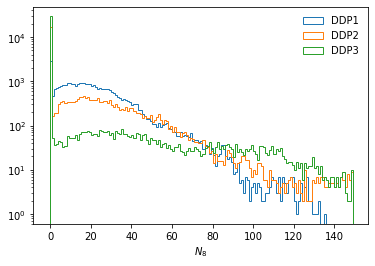

In [15]:
bins=np.arange(-1., 150., 1.)

_ = pl.hist(gama_d8['DDP1_N8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_N8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_N8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$N_8$')
pl.yscale('log')
pl.legend(frameon=False)

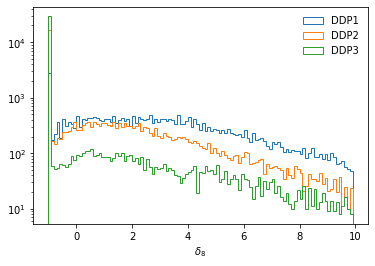

In [16]:
bins=np.arange(-1., 10., 0.1)

_ = pl.hist(gama_d8['DDP1_DELTA8'], histtype='step', bins=bins, label='DDP1')
_ = pl.hist(gama_d8['DDP2_DELTA8'], histtype='step', bins=bins, label='DDP2')
_ = pl.hist(gama_d8['DDP3_DELTA8'], histtype='step', bins=bins, label='DDP3')

pl.xlabel(r'$\delta_8$')
pl.yscale('log')
pl.legend(frameon=False)

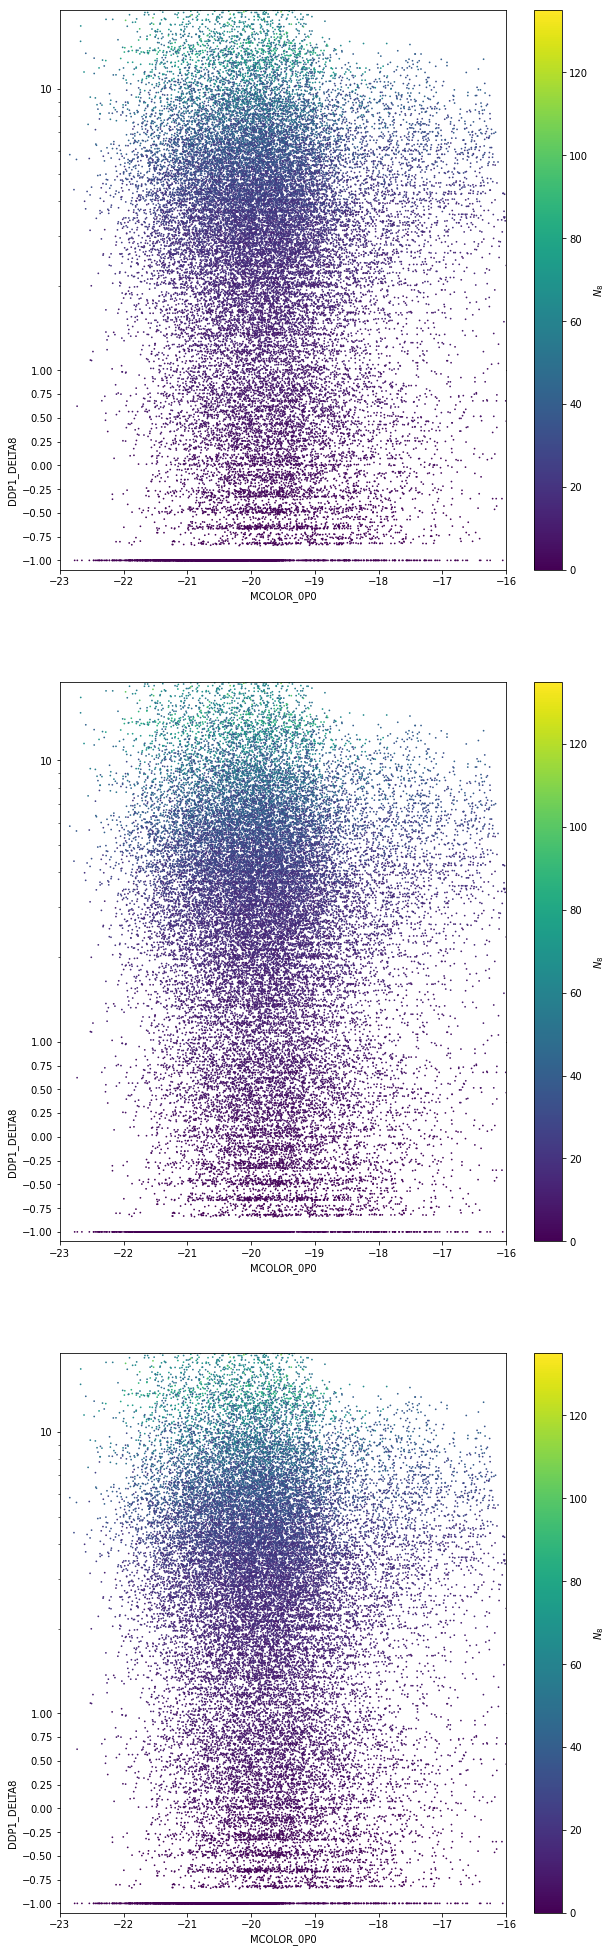

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(10, 35))

for idx, ax in enumerate(axes):
    sc = ax.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    ax.set_xlabel('MCOLOR_0P0')
    ax.set_ylabel('DDP1_DELTA8')

    ax.set_xlim(-23., -16.)
    ax.set_ylim(-1.1, 1.)
    
    ax.spines['top'].set_visible(False)
    
    divider = make_axes_locatable(ax)
    
    axLog = divider.append_axes("top", size=5.0, pad=0, sharex=ax)
    axLog.set_yscale('log')
    axLog.set_ylim((1., 19.))
    axLog.scatter(gama_d8['MCOLOR_0P0'], gama_d8['DDP1_DELTA8'], c=gama_d8['DDP1_N8'], marker='.', lw=0.0, s=12)

    axLog.spines['bottom'].set_visible(False)
    axLog.xaxis.set_ticks_position('top')
    axLog.xaxis.set_visible(False)

    axLog.set_yticks([10.])
    axLog.set_yticklabels(['10'])
    
    ax.set_title('DDP{}'.format(idx+1))

    colorbar = fig.colorbar(sc, ax=ax, label=r'$N_8$')

In [19]:
gama_d8_slice = gama_d8[np.abs(gama_d8['CARTESIAN_Z']) < 5.]

In [20]:
gama_d8_slice

CATAID,OBJID,RA,DEC,R_PETRO,ZGAMA,NQ,SPECID,SURVEY_CLASS,UMAG_DRED_SDSS,GMAG_DRED_SDSS,RMAG_DRED_SDSS,IMAG_DRED_SDSS,ZMAG_DRED_SDSS,LUMDIST,DISTMOD,GMR,REST_GMR_0P1,REST_GMR_0P1_WARN,REST_GMR_0P1_INDEX,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,Q_COLOR_0P0,EQ_ALL_0P0,EQ_COLOR_0P0,MALL_0P0,MCOLOR_0P0,Z_THETA_QALL,Z_THETA_QCOLOR,DELTA_RPETRO_FAINT,ZMAX,ZMAX_WARN,DELTA_RPETRO_BRIGHT,ZMIN,ZMIN_WARN,DDP [3],CARTESIAN_X,CARTESIAN_Y,CARTESIAN_Z,RANDSEP,RANDMATCH,BOUND_DIST,FILLFACTOR,DDP1_N8,DDP2_N8,DDP3_N8,DDP1_DELTA8,DDP2_DELTA8,DDP3_DELTA8,FIELD
int32,int64,float64,float64,float32,float32,int16,bytes33,int16,float32,float32,float32,float32,float32,float64,float64,float32,float64,int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float64,float64,float32,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,int64,int64,int64,float64,float64,float64,str4
202974,587725074451988910,131.94875747,-0.38094941,15.439772,0.05084,5,525811231307622400,6,17.48889,15.89981,15.207048,14.782374,14.484571,158.61438308850654,36.00171283208156,0.6927614,0.7628012567998671,0,5,-0.15987792255794528,-0.2299177581543143,0.06778858952584613,0.09445808967433966,0.6660919210551197,0.8,-0.049314804,-0.040672,-20.580414965010554,-20.589057768888146,36.020186617232234,36.028829421109826,4.3602276,0.31141483665507763,0.0,-3.4397717,0.010860426277939412,0.0,1 .. 0,99.94880948551709,-113.1020351567444,-1.1037868903751653,102.0464025178724,1736274,0.0,0.4000633042267677,38,50,104,7.226768156581915,4.869746931661075,5.58898110285942,G9
215888,587725075527434463,135.7697905,0.57281639,18.735546,0.10518,4,G09_Y1_FN2_132,6,21.282372,19.627787,18.69,18.216097,17.857546,341.4192784731449,37.66644020103068,0.9377861,0.9249386781695014,0,6,-0.09676152867405412,-0.0839141045486337,0.12984790865003787,0.2995676444106269,0.7680663665343328,0.8,-0.10202461,-0.084144,-18.95871739025981,-18.976597993930884,37.694263502320354,37.71214410599143,1.0644531,0.16292011480638535,0.0,-6.735546,0.005203965640297949,0.0,0 .. 0,219.53318745403044,-217.3303209820289,2.8683295049017445,193.25809826649268,645398,0.0,0.515699317569703,2,14,0,-0.664101690380352,0.2749981942696711,-1.0,G9
575055,588848899894411621,138.2662366,-0.08063431,18.909615,0.24379,4,G09_Y1_GS1_382,6,21.328186,19.916912,18.72356,18.135284,17.836687,865.0827085454449,39.685288156675114,1.1933517,0.8233048230296881,0,5,0.0569372759091851,0.42698419848496566,0.2853915774175646,0.7735109163723966,0.7052324066506368,0.8,-0.2364763,-0.195032,-20.824588868957484,-20.86603317056271,39.734203431945765,39.77564773355099,0.8903847,0.34004244351217355,0.0,-6.9096146,0.012324807191835993,0.0,1 .. 0,515.1211641105124,-467.33083376352374,-1.4953343742943903,410.99214996235617,905425,0.0,0.5418106754213334,32,0,0,4.11536702842452,-1.0,-1.0,G9
599772,588848900428792318,132.53869558,0.38146972,19.786453,0.19576,4,G09_Y5_050_090,5,22.462759,21.011246,19.825298,19.383318,19.082012,674.7481285826782,39.145708443561496,1.1859474,0.9157075376116003,0,6,0.02074272795280087,0.290982608554091,0.24751972952575424,0.6711078274901976,0.7623593202484473,0.8,-0.1898872,-0.156608,-19.416887730191362,-19.450166925619257,39.203340977261675,39.23662017268957,0.01354599,0.19680693274419497,0.0,-7.7864532,0.006463966221387162,0.0,0 .. 0,377.9949281035043,-418.9567391081886,3.3779124907318456,377.1950361086607,1032396,0.0,0.4970483476756811,88,0,0,14.33410444590108,-1.0,-1.0,G9
209502,587725074989646087,133.62290838,0.17437275,18.139587,0.11115,4,G09_Y1_DS2_293,6,19.710155,18.672766,18.139122,17.76011,17.603159,362.3097043485738,37.79539983313974,0.5336437,0.5186941917930075,0,3,-0.09784880098072932,-0.08289927023955716,0.10457835446052668,0.15315069336305898,0.48507138363164737,2.12,-0.1078155,-0.23563798,-19.652575288633,-19.524752807537208,37.79216269097675,37.66434020988096,1.6604118,0.24543073294208415,0.0,-6.1395874,0.006707648348435936,0.0,0 .. 0,222.

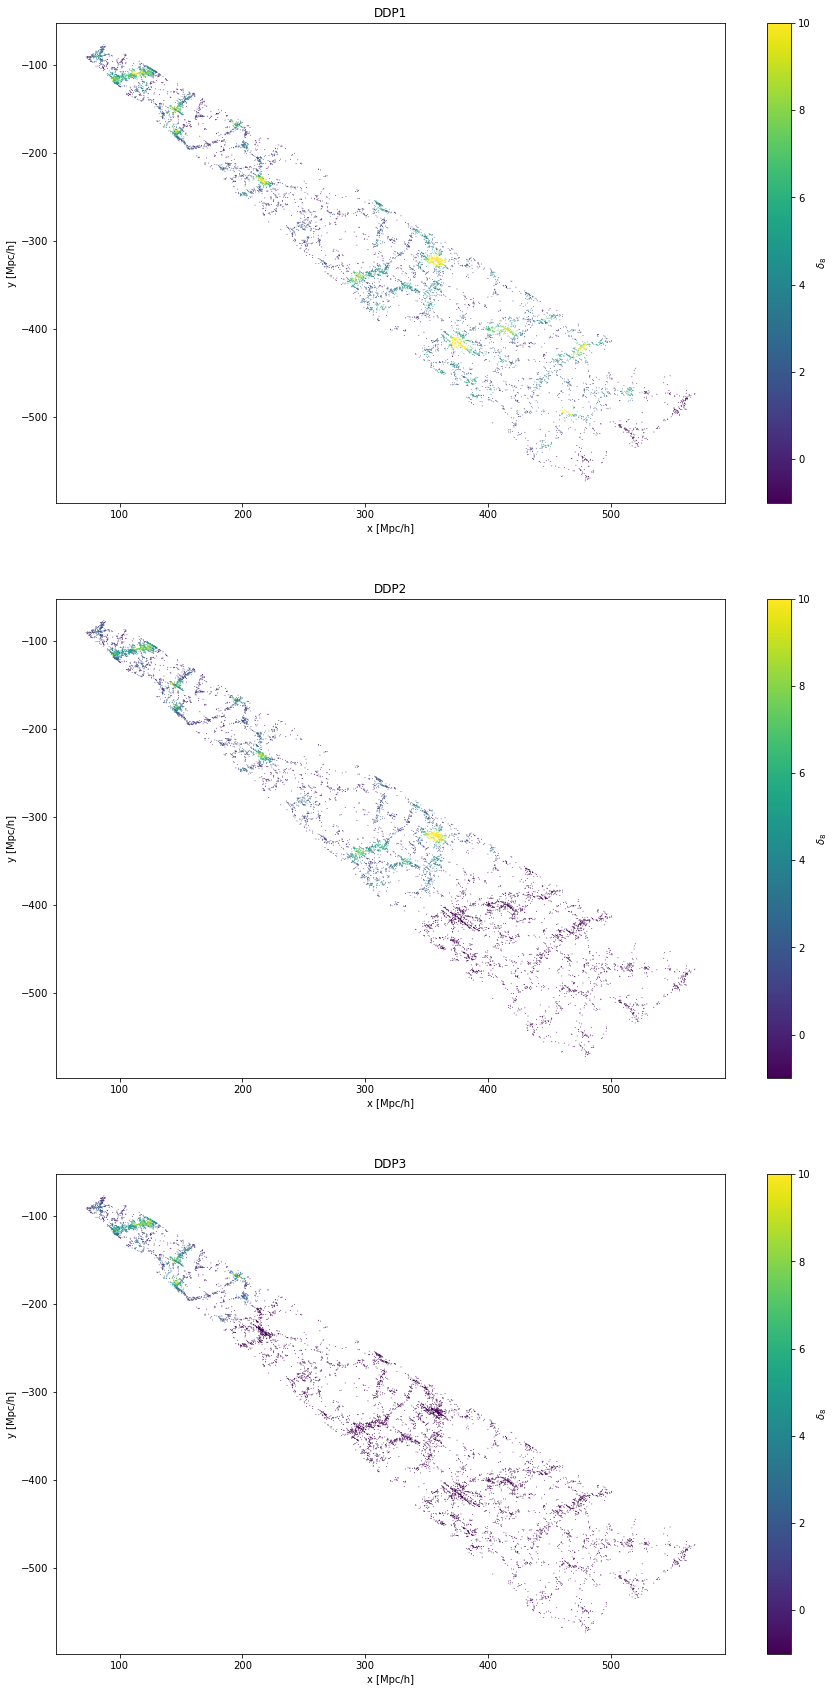

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(15, 30))

for idx in range(3):
    sc = axes[idx].scatter(gama_d8_slice['CARTESIAN_X'],\
                           gama_d8_slice['CARTESIAN_Y'],\
                           c=gama_d8_slice['DDP{}_DELTA8'.format(idx+1)],\
                           marker='.',\
                           lw=0.0,\
                           s=3,\
                           vmin=-1.,\
                           vmax=10.)
    
    # axes[idx].set_ylim(100., -100.)
    
    colorbar = fig.colorbar(sc, ax=axes[idx], label=r'$\delta_8$')    
    
    axes[idx].set_xlabel('x [Mpc/h]')
    axes[idx].set_ylabel('y [Mpc/h]')
    
    axes[idx].set_title('DDP{}'.format(idx+1))

# Done.